In [1]:
## plot within the notebook
%matplotlib inline
import warnings
## No annoying warnings
warnings.filterwarnings('ignore')
# - AstrObject Module 
from astrobject.utils.tools import load_pkl
from astrobject.astrobject.baseobject import astrotarget
from astrobject.astrobject.instruments import instrument

In [2]:
# -------------------------
# - Build the astrotarget
# -------------------------
# Basic data
dicosn = load_pkl("data/PTF10qjq_sninfo.pkl")
print dicosn

{'object': u'PTF10qjq', 'Ra': 256.801708333, 'zcmb': 0.028107, 'Dec': 35.5098277778, 'type': u'Ia', 'MWebmv': 0.0279, 'IUACname': None}


In [3]:
# Create the astrotarget
sn = astrotarget(name=dicosn["object"], zcmb=dicosn["zcmb"],
                ra=dicosn["Ra"],dec=dicosn["Dec"],
                type_=dicosn["type"],forced_mwebmv=dicosn["MWebmv"])

{'ax': <matplotlib.axes._axes.Axes at 0x108868bd0>,
 'figure': <matplotlib.figure.Figure at 0x108816950>,
 'imshow': <matplotlib.image.AxesImage at 0x10f24cf50>,
 'prop': {'interpolation': 'nearest', 'origin': 'lower'},
 'target_plot': None,
 'wcs_coords': False}

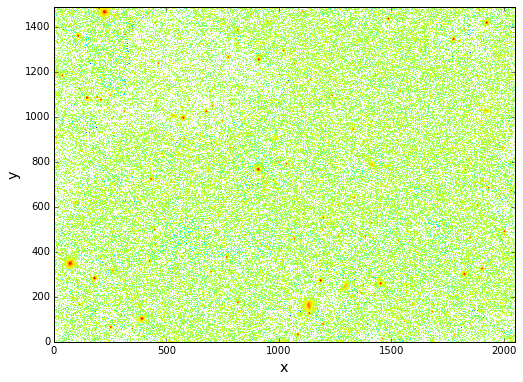

In [4]:
# -------------------------
# - Build an Instrument (Image)
# -------------------------
# - The instrument object, example
# instrument.instrument recognize which
# kind of instrument the file is.
# Here it is a sdss file, this will call 
# -> instrument.sdss
sdssg = instrument.instrument("data/sdss_PTF10qjq_g.fits")
# - Let's see how it looks like
sdssg.show()

In [5]:
# let's add a target
sdssg.set_target(sn)

In [7]:
print "what are the file's information ?"
print sdssg.target.name, sdssg.instrument_name, sdssg.bandname, sdssg.lbda,  sdssg.mab0
print "What is the coordinate of the pixel 1000,800 ?"
print sdssg.pixel_to_coords(1000,800)

 what are the file's information ?
PTF10qjq SDSS sdssg 4717.59977746 22.5
What is the coordinate of the pixel 1000,800 ?
[256.8275128053359, 35.441625745612484]


{'ax': <matplotlib.axes._axes.Axes at 0x121ac3090>,
 'figure': <matplotlib.figure.Figure at 0x121a43410>,
 'imshow': <matplotlib.image.AxesImage at 0x121bab990>,
 'prop': {'interpolation': 'nearest', 'origin': 'lower'},
 'target_plot': [<matplotlib.lines.Line2D at 0x121babdd0>],
 'wcs_coords': False}

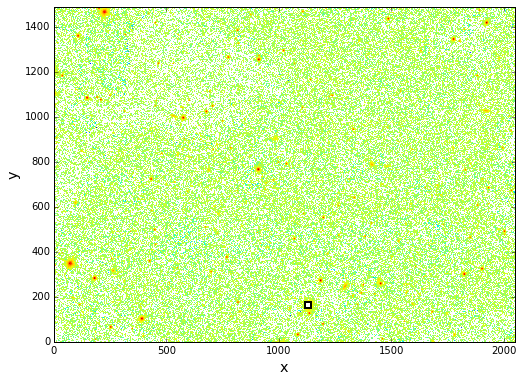

In [8]:
# - and relaunch show to see where it is
sdssg.show()

{'ax': <matplotlib.axes._axes.Axes at 0x121858950>,
 'figure': <matplotlib.figure.Figure at 0x121b4e3d0>,
 'imshow': <matplotlib.image.AxesImage at 0x124fe9290>,
 'prop': {'interpolation': 'nearest', 'origin': 'lower'},
 'target_plot': [<matplotlib.lines.Line2D at 0x124fe96d0>],
 'wcs_coords': False}

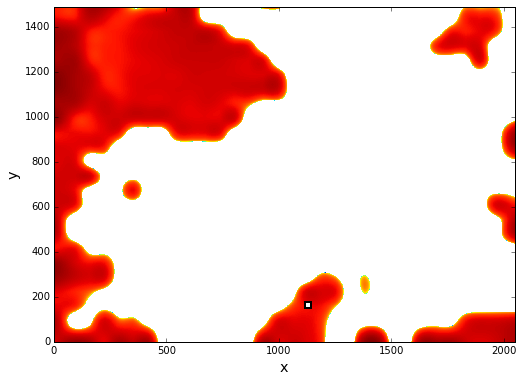

In [9]:
# - You what to see the background image ?
sdssg.show(toshow="background")

In [10]:
# Information:
# Background here is the default one estimated from sep
# It is easy to bypass by defining a set_background method

In [11]:
# -------------------------
# - Get a Local PhotoPoint
# -------------------------
ppoint = sdssg.get_target_photopoint(r_pixels=5)

In [12]:
print "Information of the photopoint ?"
print ppoint.lbda,ppoint.flux, ppoint.var, ppoint.source, ppoint.instrument_name

Information of the photopoint ?
4717.59977746 6.22434856166e-16 7.91578931663e-34 image SDSS


In [13]:
# Check the MutliBand Module Now